In [1]:
#!pip install --upgrade seaborn==0.9.0
#!pip install obspy 

## Imports

In [2]:
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime

import requests
import pandas as pd
import datetime
import pytz

%matplotlib inline

## Ref for OSSM

In [65]:
#No Rain or Wind
#https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/22/OO-HYEA2--YDH-2019-03-22T20:40:00.000000.mseed

#Rain
#https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/04/16/OO-HYEA2--YDH-2019-04-16T03:10:00.000000.mseed

#Wind
#https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/07/OO-HYEA2--YDH-2019-03-07T00:16:01.200250.mseed

#Both
#https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/02/OO-HYEA2--YDH-2019-01-02T01:05:00.000015.mseed


## Ref for OOSM

In [66]:
#No Rain or Wind
#not present in this data set

#Rain
#https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/05/OO-HYEA1--YDH-2019-02-05T00:10:00.000015.mseed

#Wind
#https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/10/OO-HYEA1--YDH-2019-01-10T00:35:00.000015.mseed

#Both
#https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/01/OO-HYEA1--YDH-2019-01-01T02:50:00.000015.mseed

## Url for Each Location and Titles

In [70]:
OSSM_set = ['https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/22/OO-HYEA2--YDH-2019-03-22T20:40:00.000000.mseed',
           'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/04/16/OO-HYEA2--YDH-2019-04-16T03:10:00.000000.mseed',
           'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/07/OO-HYEA2--YDH-2019-03-07T00:16:01.200250.mseed',
           'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/02/OO-HYEA2--YDH-2019-01-02T01:05:00.000015.mseed']

In [84]:
OSSM_titles = ['No Rain or Wind','Just Rain','Just Wind','Both Rain and Wind']

In [71]:
OOSM_set = ['https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/05/OO-HYEA1--YDH-2019-02-05T00:10:00.000015.mseed',
           'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/10/OO-HYEA1--YDH-2019-01-10T00:35:00.000015.mseed',
           'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/01/OO-HYEA1--YDH-2019-01-01T02:50:00.000015.mseed']

In [85]:
OOSM_titles = ['Just Rain','Just Wind','Both Rain and Wind']

## Graphs for OSCBEP (or OSSM)

Graphs for Neither Rain or Wind, Just Rain, Just Wind and Both Rain and Wind Respectively at OSSM


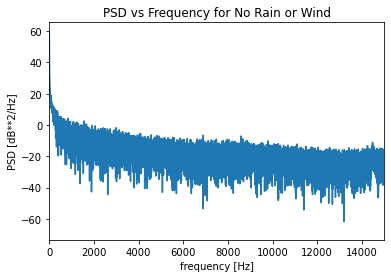

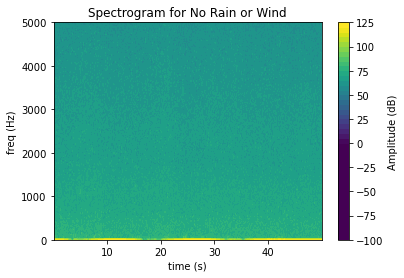

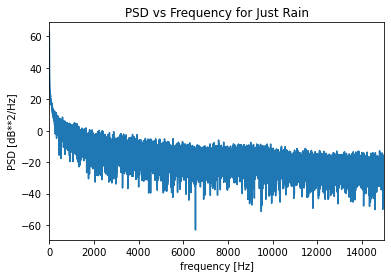

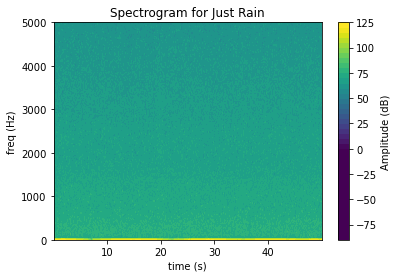

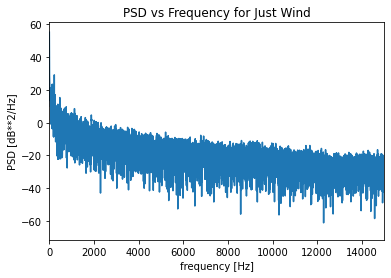

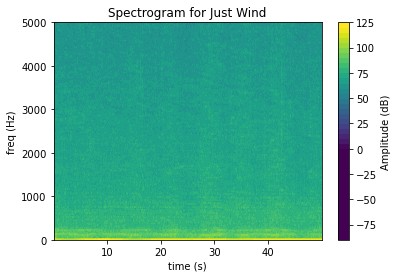

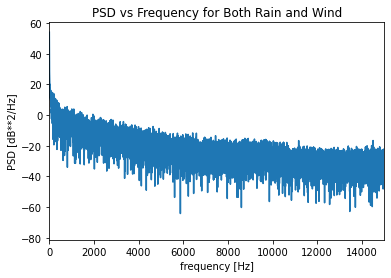

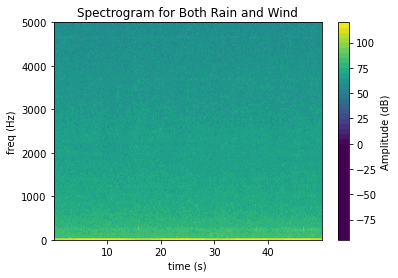

In [122]:
print('Graphs for Neither Rain or Wind, Just Rain, Just Wind and Both Rain and Wind Respectively at OSSM')
for i in range(len(OSSM_set)):
    st = read(OSSM_set[i])
    t_start = st[0].stats.starttime 
    t_end = st[0].stats.starttime + 50
    sliced = st.slice(t_start, t_end)
    
    fs = st[0].stats.sampling_rate
    
    from scipy.fftpack import fft
    x = (sliced[0].data)*np.hanning(len(sliced[0].data))
    xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
    fre = np.linspace(1,fs,64000)
    data_db = 10*np.log10(np.abs(xfft))+169-128.9
    plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [dB**2/Hz]')
    plt.title('PSD vs Frequency for ' + OSSM_titles[i])
    plt.xlim(0,15000)
    plt.show()

    npts = len(sliced[0])
    end = npts / fs
    nfft = int(fs/16)  # number of fft points of each bin
    #print(nfft)
    per_lap = 0.90      # percentage of overlap
    nlap = int(nfft * float(per_lap))   # number of overlapped samples
    
    # using mlab to create the array of spectrogram 
    specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
    specgram = 10 * np.log10(specgram) +169-128.9
    plt.contourf(time,freq,specgram,50,vmin=0, vmax=120)
    plt.xlabel('time (s)')
    plt.ylabel('freq (Hz)')
    plt.title('Spectrogram for ' + OSSM_titles[i])
    plt.colorbar(label = 'Amplitude (dB)')
    plt.ylim(0,5000)
    plt.show()

## Graph of OCBEP (or OOSM)

Graphs for Just Rain, Just Wind and Both Rain and Wind Respectively at OOSM


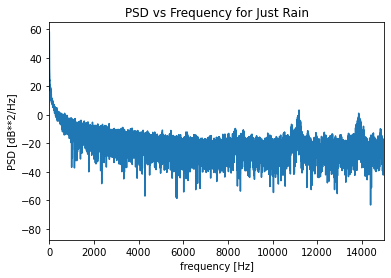

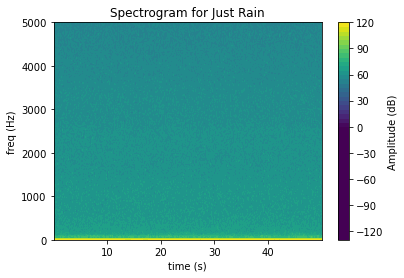

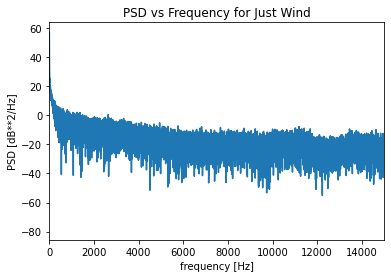

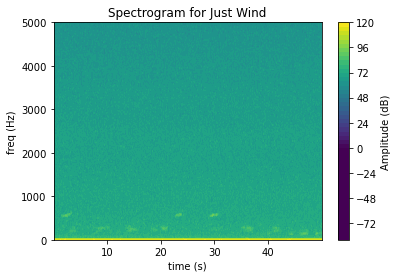

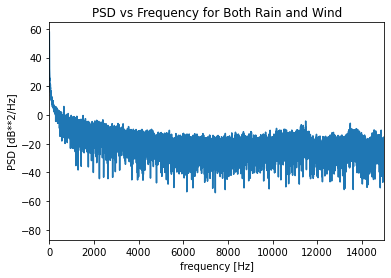

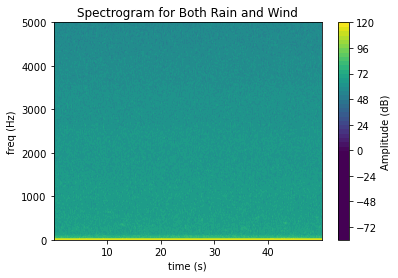

In [123]:
print('Graphs for Just Rain, Just Wind and Both Rain and Wind Respectively at OOSM')
for i in range(len(OOSM_set)):
    st = read(OOSM_set[i])
    t_start = st[0].stats.starttime 
    t_end = st[0].stats.starttime + 50
    sliced = st.slice(t_start, t_end)
    
    fs = st[0].stats.sampling_rate
    
    from scipy.fftpack import fft
    x = (sliced[0].data)*np.hanning(len(sliced[0].data))
    xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
    fre = np.linspace(1,fs,64000)
    data_db = 10*np.log10(np.abs(xfft))+169-128.9
    plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [dB**2/Hz]')
    plt.title('PSD vs Frequency for ' + OOSM_titles[i])
    plt.xlim(0,15000)
    plt.show()

    npts = len(sliced[0])
    end = npts / fs
    nfft = int(fs/16)  # number of fft points of each bin
    #print(nfft)
    per_lap = 0.90      # percentage of overlap
    nlap = int(nfft * float(per_lap))   # number of overlapped samples
    
    # using mlab to create the array of spectrogram 
    specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
    specgram = 10 * np.log10(specgram) +169-128.9
    plt.contourf(time,freq,specgram,50,vmin=0, vmax=120)
    plt.xlabel('time (s)')
    plt.ylabel('freq (Hz)')
    plt.title('Spectrogram for ' + OOSM_titles[i])
    plt.colorbar(label = 'Amplitude (dB)')
    plt.ylim(0,5000)
    plt.show()

## Quake

In [98]:
earthquake = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2017/05/19/OO-HYEA2--YDH-2017-05-19T16:20:00.000000.mseed'

In [125]:
st = read(earthquake)

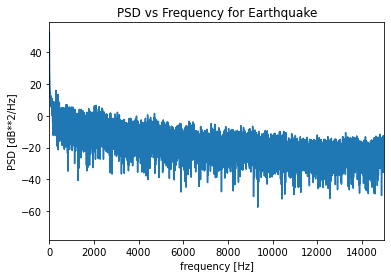

4000


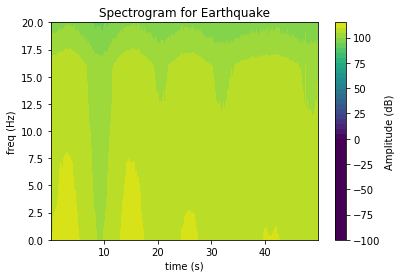

In [127]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 50
sliced = st.slice(t_start, t_end)

fs = st[0].stats.sampling_rate

from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('PSD vs Frequency for Earthquake')
plt.xlim(0,15000)
plt.show()

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,50,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.title('Spectrogram for Earthquake')
plt.colorbar(label = 'Amplitude (dB)')
plt.ylim(0,20)
plt.show()

## Animal Call

In [100]:
animal = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2017/10/06/OO-HYEA2--YDH-2017-10-06T20:20:00.000000.mseed'

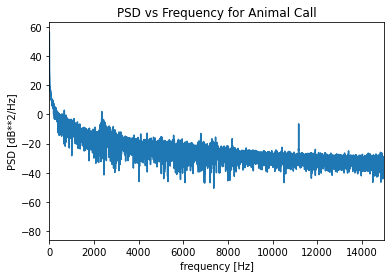

4000


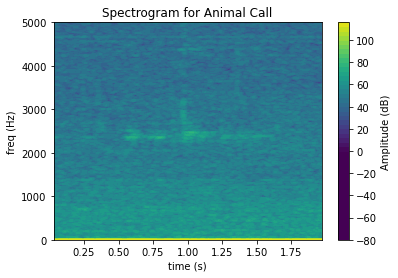

In [111]:
st = read(animal)
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)

fs = st[0].stats.sampling_rate

from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('PSD vs Frequency for Animal Call')
plt.xlim(0,15000)
plt.show()

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,50,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.title('Spectrogram for Animal Call')
plt.colorbar(label = 'Amplitude (dB)')
plt.ylim(0,5000)
plt.show()

## Air Gun

In [102]:
bubbles = 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:00:00.000015.mseed'

In [116]:
st = read(bubbles)

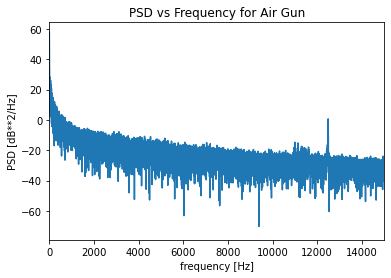

4000


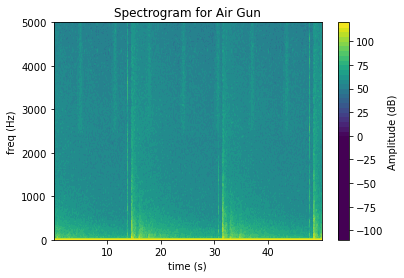

In [118]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 50
sliced = st.slice(t_start, t_end)

fs = st[0].stats.sampling_rate

from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.title('PSD vs Frequency for Air Gun')
plt.xlim(0,15000)
plt.show()

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,50,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.title('Spectrogram for Air Gun')
plt.colorbar(label = 'Amplitude (dB)')
plt.ylim(0,5000)
plt.show()